In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.integrate import odeint

# Ac Pressure Charecteristcc

(copied from) "Single-bubble sonoluminescence" Michael P. Brenner, Sascha Hilgenfeldt and Detlef Lohse*

. Classical bubble dynamics calculation for a driving
pressure amplitude Pa51.2 atm, frequency f526.5 kHz, and
ambient bubble radius R054.5 mm. One oscillation cycle of
R(t) is shown. The bubble expands to nearly ten times its
ambient radius, then collapses extremely quickly, leading to
adiabatic heating of the gas inside the bubble. The collapse is
followed by afterbounces with roughly the eigenfrequency of
the bubble. The vertical dashed lines and small-print numbers
indicate the intervals 1–10 (summarized in Sec. VI) at which
different physical processes are important, which are discussed
throughout the review. The inset shows the innermost 60 ns
around the time t* of maximum compression and highlights
the bubble radius during Rayleigh cavitation collapse, where
the light is emitted.

# Collapse
A bubble initially at eqb with ambient pressure $p_{\infty, 0}$ is suddenly appplied with a huge pressure pertubation $\Delta p$
$$\forall ~t>0, \quad p_\infty(t) = p_{\infty, 0} + \Delta p ~~\text{with} ~~\Delta p \gg  p_{\infty, 0}$$


# Rayleigh-Plesset Equation
$$
    \frac{1}{\rho_L} {(p_B(t) - p_{\infty}(t))} =  R\frac{d^2 R}{dt^2}
             + \frac{3}{2} (\frac{dR}{dt})^2 + \frac{4 \nu_L}{R} \frac{dR}{dt} + \frac{2\sigma}{\rho_L R}
$$
## Non dimensional numbers

(Use characteristic velocity scale as collapse velocity 
 $U_c = \sqrt{\frac{\Delta p}{\rho_L} }$ and length  scale $R_0$ and time scale $R_0/U_c$)

(1) ratio of  new ambient pressure to  old
$$
    P = \frac{p_{\infty}}{p_{\infty, 0}} = \frac{p_{\infty, 0} + \Delta p}{p_{\infty, 0}}
$$ 
(with $P>0$). In violent collapse $P \gg 1$

(2) Weber Number, $We$
$$
        We = \frac{\Delta p R_0}{\sigma}
$$
(5) Reynolds Number
$$
    Re = \frac{R_0 \sqrt{\Delta p ~ \rho_L}}{\mu_L} 
$$
(6) Non-dim time
    $$
        t^* = {t}{U/R_0} = \sqrt{ \frac{\Delta p}{\rho_L} } \frac{1}{R_0} ~ t
    $$
(7) Non-dim Radius
    $$
       R^*(t^*) =  \frac{R(t^*)}{R_0}
    $$
(8) Non-dim Interface velocity
    $$
       U^*(t^*) = \frac{d R^*}{d t^*} =  \sqrt{\frac{\rho_L}{\Delta p}} \frac{d R}{d t}
    $$
 We alse have
    $$
       \frac{d R}{d t} =  \sqrt{\frac{\Delta p} {\rho_L}} \frac{d R^*}{d t^*} ~;\quad~
       \frac{d^2 R}{d t^2} =  \frac{1}{R_0} \frac{\Delta p} {\rho_L}  \frac{d^2 R^*}{d {t^*}^2} ~;\quad~
       \frac{p_{\infty, 0}}{\Delta p} = \frac{1}{P - 1} ~;\quad~
       \frac{p_{\infty}}{\Delta p} = \frac{P}{P - 1}
    $$
    
## R-P (Non-dimensionalised)

$$
    R^*\frac{dU^*}{dt^*} + \frac{3}{2} {U^*}^2 + \frac{4}{Re} \frac{U^*}{R^*} + \frac{2}{We} \frac{1}{R^*} =
     \bigg( \frac{1}{P-1} + \frac{2}{We} \bigg) \left( \frac{1}{R^*} \right)^{3\gamma} - \frac{P}{P-1} 
$$
which gives

$$
\frac{d}{dt^*} 
\begin{bmatrix} R^* \\ U^* \end{bmatrix} =
\begin{bmatrix} U^* \\ \frac{1}{R^* }\left[
    \bigg( P - 1 + \frac{2}{We} \bigg) \left( \frac{1}{R^*} \right)^{3\gamma} - P -  \frac{3}{2} {U^*}^2 - \frac{4}{Re} \frac{U^*}{R^*} - \frac{2}{We} \frac{1}{R^*}
\right]
\end{bmatrix}
$$

In the above equation
$$  p_G(t^*) = \left[ \bigg(\frac{1}{P - 1}+ \frac{2}{We} \bigg) \left( \frac{1}{R^*}\right)^{3\gamma} \right] \Delta p  $$
$$  p_\infty (t^*) =  \frac{P}{P - 1} ~ \Delta p$$

## New stable radius ($We >> 1$). 
Assuming the bubble doesn't collapse completely , the new stable radius for an initially 'large' bubble
($We >> 1$)
$$
    R_\infty = R(t)\bigg|_{t \rightarrow \infty} 
    = R_0 \left[ \frac{ \frac{1}{P - 1}+ \frac{2}{We} }{ \frac{P}{P - 1} } \right]^{ \frac{1}{3\gamma} }
    = R_0 \left[ \frac{1}{P}+ \frac{P - 1}{P}\frac{2}{We} \right]^{ \frac{1}{3\gamma} } 
    \quad ~\text{given}\quad We \gg 1
$$

## Integration of R-P (Non-dim)

In [2]:
#partial pressure of air as a function of R
def p_gas(Rstar):
    pg0 = 1./(P - 1) + 2./We;
    return pg0*np.power(Rstar, -3*gamma) 


#d/dt (x) = equation(x,t)
def RP(x, tstar):
    (Rstar,Ustar) = x;
    dfdt = ( p_gas(Rstar) - P/(P - 1) - 1.5*Ustar**2 - 4*Ustar/(Re * Rstar) - 2/(We*Rstar) )/Rstar
    return (Ustar, dfdt)

def NewRadius():
    return np.power((1 + 2*(P-1)/We)/P, 1/(3*gamma))

def solve_RP (params, tsample):
    P, We, Re =  params;
    R_RP = odeint(RP, [1, 0], tstarsample)
    Ustarsample = R_RP[:,1]
    Rstarsample = R_RP[:,0]
    return (Rstarsample, Ustarsample);
    

## An Example


## Bubble response (RP) ('Large' Bubble $We >> 1$)


$$ P = 10 $$
$$ Re = 10 $$
$$ We = 1000 $$

In [3]:
gamma = 1.4;

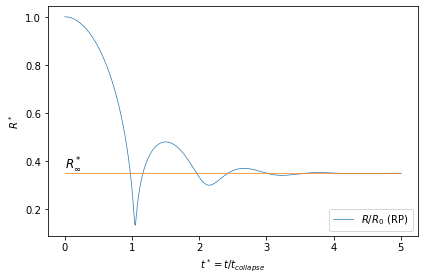

In [4]:
tend = 5.;  # t_end = 5 t_collapse
N=50000
tstarsample  = (tend/N)*np.array(range(N))

P = 100; Re = 10; We = 1000;
Rstarsample,  Ustarsample = solve_RP([P, We, Re], tstarsample)

fig, ax1 = plt.subplots()

ax1.set_xlabel(r"$t^* = t/t_{collapse}$")
ax1.set_ylabel(r"$R^*$")
ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"$R/R_0$ (RP)")

Rinf = NewRadius();
ax1.plot([0,tend], [Rinf, Rinf], linewidth = 0.7)
plt.text(0, Rinf, r'$R_\infty^*$',ha='left', va='bottom', fontsize=12)

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


## Viscous Damping. Varying $Re$

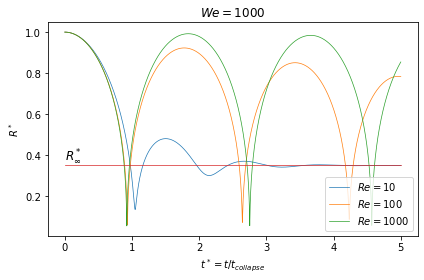

In [5]:
fig, ax1 = plt.subplots()

ax1.set_title(r"$We=1000$")
ax1.set_xlabel(r"$t^* = t/t_{collapse}$")
ax1.set_ylabel(r"$R^*$")

P = 100; Re = 10; We = 1000;
Rstarsample,  Ustarsample = solve_RP([P, We, Re], tstarsample)
ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"$Re = 10$")
P = 100; Re = 100; We = 1000;
Rstarsample,  Ustarsample = solve_RP([P, We, Re], tstarsample)
ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"$Re = 100$")
P = 100; Re = 1000; We = 1000;
Rstarsample,  Ustarsample = solve_RP([P, We, Re], tstarsample)
ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"$Re = 1000$")

Rinf = NewRadius();
ax1.plot([0,tend], [Rinf, Rinf], linewidth = 0.7)
plt.text(0, Rinf, r'$R_\infty^*$',ha='left', va='bottom', fontsize=12)

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

## Small Perturbation. $P \rightarrow 1$ (Compare with Linearised solution)


   

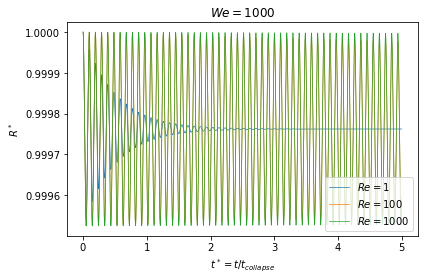

In [6]:
fig, ax1 = plt.subplots()

ax1.set_title(r"$We=1000$")
ax1.set_xlabel(r"$t^* = t/t_{collapse}$")
ax1.set_ylabel(r"$R^*$")

P = 1.001; Re = 1; We = 1000;
Rstarsample,  Ustarsample = solve_RP([P, We, Re], tstarsample)
ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"$Re = 1$")
P = 1.001; Re = 100; We = 1000;
Rstarsample,  Ustarsample = solve_RP([P, We, Re], tstarsample)
ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"$Re = 100$")
P = 1.001; Re = 1000; We = 1000;
Rstarsample,  Ustarsample = solve_RP([P, We, Re], tstarsample)
ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"$Re = 1000$")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

As you have noticed the time scale involved is no more $t_{collapse} \approx R_0 \sqrt{\frac{\rho_L}{\Delta p}}$ but rather inverse of damped frequency $\frac{1}{\omega_d} \approx \frac{1}{\omega_d}$ of the bubble.

### Linearised R-P (Non-dimensionalised)
For a small perturbation from $p_\infty (t) $ with $\Delta p$ 
    $$p_\infty (t)  = p_{\infty,0} +  \Delta p \quad \text{with} \quad \Delta p \ll  p_{\infty,0} $$ 
the bubble responds as 
    $$ R(t) = R_0  -  R_0 \epsilon_0 \left(1 - \frac{1}{ \sqrt{1 - \zeta^2} } e^{\zeta \omega_0 t } ~Re \left\{ e^{j ( \omega_d t + \phi)} \right\} \right)$$
where $\epsilon_0$ and $\phi$ are solved using the response equation 
$$
\epsilon_0 \left[ -\omega^2  + j\omega \frac{4\mu_L}{\rho_L R_0^2} + \omega_0^2 \right] = \frac{\Delta p}{\rho_L R_0^2}
$$
where
$$
    \omega_0^2 = \frac{1}{\rho_L R_0^2} \left(  {3kp_{G,0}} - \frac{2\sigma}{R_0} \right)
$$
$$
    \omega_d = \omega_0 \sqrt{1 - \zeta^2}
$$
$$
     \zeta = \frac{2\mu_L}{\rho_L R_0^2 \omega_0}
$$
$$
    \epsilon_0 = \frac{\Delta p}{\rho_L R_0^2 \omega_0^2}
$$
$$
    \phi = arctan {\bigg( \frac{ \zeta}{ \sqrt{( 1 - \zeta^2  )} } \bigg)  } 
$$




### Comparing R-P and Linearised model.

Time scale in this case is $\approx \frac{1}{\omega_0}$ where
$$
    \omega_0^2 = \frac{1}{\rho_L R_0^2} \left(  {3\gamma p_{G,0}} - \frac{2\sigma}{R_0} \right)
$$
$$
    \omega_0^2 = \frac{p_{\infty,0}}{\rho_L R_0^2} \left(  3 \gamma (1 + 2\frac{P-1}{We}) - 2\frac{P-1}{We} \right)
$$
which gives 
$$
    \epsilon_0 = \frac{\Delta p}{\rho_L R_0^2 \omega_0^2} = \frac{P-1}{ \left(  3 \gamma (1 + 2\frac{P-1}{We}) - 2\frac{P-1}{We} \right)  } 
$$
and
$$
    \zeta = \frac{2\mu_L}{\rho_L R_0^2 \omega_0} =  \frac{2 R_0 \sqrt{\Delta p ~ \rho_L}}{Re~ \rho_L R_0^2 \omega_0} = \frac{2}{Re} \sqrt{\frac{P-1}{ \left(  3 \gamma (1 + 2\frac{P-1}{We}) - 2\frac{P-1}{We} \right)   }  }
$$

## Doesn't work?


In [7]:
def solve_linear (params, tstar_omega0_sample):
    _t = tstar_omega0_sample
    # time is non-dim wth omega0
    P, We, Re =  params;
    eps0  = (P-1)/(3*gamma*(1 + 2*(P-1)/We) - 2*(P-1)/We)
    zeta = 2*np.sqrt(eps0)/Re
    phi = np.arctan2(zeta, np.sqrt(1 - zeta**2))
    one = np.ones(len(_t))
    Rstarsample = one - eps0 * (one - np.exp(-zeta* _t)*np.cos(np.sqrt(1 - zeta**2) * _t + phi)/np.sqrt(1 - zeta**2) )
    Ustarsample = Rstarsample # dummy
    return (Rstarsample, Ustarsample);

def EPS0 (params):
    P, We, Re =  params;
    eps0  = (P-1)/(3*gamma*(1 + 2*(P-1)/We) - 2*(P-1)/We)
    zeta = 2*np.sqrt(eps0)/Re
    phi = np.arctan2(zeta, np.sqrt(1 - zeta**2))
    return eps0, zeta, phi

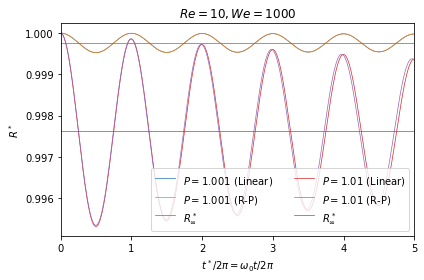

In [8]:
N=1000

tend = 5.;  # t_end = 5 (2pi) omega_0 t 
tstarsample  = 2*np.pi*np.linspace(0, tend, N, endpoint = True)

#tstarsample  = np.linspace(0, 10, 1000, endpoint = True)
fig, ax1 = plt.subplots()

ax1.set_title(r"$Re=10, We=1000$")
ax1.set_xlabel(r"$t^*/2\pi = \omega_0 t/2\pi$")
ax1.set_ylabel(r"$R^*$")

P = 1.001; Re = 10; We = 1000;

#linear
Rstarsample,  Ustarsample = solve_linear([P, We, Re], tstarsample)
ax1.plot(tstarsample/(2*np.pi), Rstarsample, linewidth = 0.7, label = r"$P = 1.001$ (Linear)")

eps0, zeta, phi = EPS0 ([P, We, Re]);
#RP (modifying the non-dim time)
tend2 = tend*np.sqrt(eps0)
tstarsample  = 2*np.pi*np.linspace(0, tend2, N, endpoint = True)

Rstarsample,  Ustarsample = solve_RP([P, We, Re], tstarsample)
ax1.plot(tstarsample/(2*np.pi*np.sqrt(eps0)), Rstarsample, linewidth = 0.7, label = r"$P = 1.001$ (R-P)")
ax1.plot([0,10], [1-eps0, 1-eps0], linewidth = 0.7, label = r"$R_\infty^*$")




tstarsample  = 2*np.pi*np.linspace(0, tend, N, endpoint = True)
P = 1.01; Re = 10; We = 1000;

#linear
Rstarsample,  Ustarsample = solve_linear([P, We, Re], tstarsample)
ax1.plot(tstarsample/(2*np.pi), Rstarsample, linewidth = 0.7, label = r"$P = 1.01$ (Linear)")

eps0, zeta, phi = EPS0 ([P, We, Re]);
#RP (modifying the non-dim time)
tend2 = tend*np.sqrt(eps0)
tstarsample  = 2*np.pi*np.linspace(0, tend2, N, endpoint = True)

Rstarsample,  Ustarsample = solve_RP([P, We, Re], tstarsample)
ax1.plot(tstarsample/(2*np.pi*np.sqrt(eps0)), Rstarsample, linewidth = 0.7, label = r"$P = 1.01$ (R-P)")
ax1.plot([0,10], [1-eps0, 1-eps0], linewidth = 0.7, label = r"$R_\infty^*$")

plt.xlim([0, 5])
ax1.legend(loc = "lower right", ncol=2, handleheight=2.4, labelspacing=0.05)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

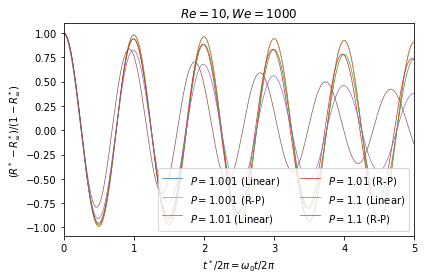

In [9]:
N=1000

tend = 5.;  # t_end = 5 (2pi) omega_0 t 
tstarsample  = 2*np.pi*np.linspace(0, tend, N, endpoint = True)

#tstarsample  = np.linspace(0, 10, 1000, endpoint = True)
fig, ax1 = plt.subplots()

ax1.set_title(r"$Re=10, We=1000$")
ax1.set_xlabel(r"$t^*/2\pi = \omega_0 t/2\pi$")
ax1.set_ylabel(r"$(R^* - R_\infty^*)/(1 - R_\infty^*)$")

##########################
##########################
##########################

P = 1.001; Re = 10; We = 1000;
eps0, zeta, phi = EPS0 ([P, We, Re]);
Rstar_infty =  1. - eps0;

#linear
Rstarsample,  Ustarsample = solve_linear([P, We, Re], tstarsample)
ax1.plot(tstarsample/(2*np.pi), ( Rstarsample - Rstar_infty)/eps0, linewidth = 0.7, label = r"$P = 1.001$ (Linear)")

#RP (modifying the non-dim time)
tend2 = tend*np.sqrt(eps0)
tstarsample  = 2*np.pi*np.linspace(0, tend2, N, endpoint = True)

Rstarsample,  Ustarsample = solve_RP([P, We, Re], tstarsample)
ax1.plot(tstarsample/(2*np.pi*np.sqrt(eps0)), ( Rstarsample - Rstar_infty)/eps0, linewidth = 0.7, label = r"$P = 1.001$ (R-P)")
#ax1.plot([0,10], [1-eps0, 1-eps0], linewidth = 0.7, label = r"$R_\infty^*$")


##########################
##########################
##########################

tstarsample  = 2*np.pi*np.linspace(0, tend, N, endpoint = True)
P = 1.01; Re = 10; We = 1000;
eps0, zeta, phi = EPS0 ([P, We, Re]);
Rstar_infty =  1. - eps0;

#linear
Rstarsample,  Ustarsample = solve_linear([P, We, Re], tstarsample)
ax1.plot(tstarsample/(2*np.pi), ( Rstarsample - Rstar_infty)/eps0, linewidth = 0.7, label = r"$P = 1.01$ (Linear)")

#RP (modifying the non-dim time)
tend2 = tend*np.sqrt(eps0)
tstarsample  = 2*np.pi*np.linspace(0, tend2, N, endpoint = True)

Rstarsample,  Ustarsample = solve_RP([P, We, Re], tstarsample)
ax1.plot(tstarsample/(2*np.pi*np.sqrt(eps0)), ( Rstarsample - Rstar_infty)/eps0, linewidth = 0.7, label = r"$P = 1.01$ (R-P)")
#ax1.plot([0,10], [1-eps0, 1-eps0], linewidth = 0.7, label = r"$R_\infty^*$")


##########################
##########################
##########################

tstarsample  = 2*np.pi*np.linspace(0, tend, N, endpoint = True)
P = 1.1; Re = 10; We = 1000;
eps0, zeta, phi = EPS0 ([P, We, Re]);
Rstar_infty =  1. - eps0;

#linear
Rstarsample,  Ustarsample = solve_linear([P, We, Re], tstarsample)
ax1.plot(tstarsample/(2*np.pi), ( Rstarsample - Rstar_infty)/eps0, linewidth = 0.7, label = r"$P = 1.1$ (Linear)")

#RP (modifying the non-dim time)
tend2 = tend*np.sqrt(eps0)
tstarsample  = 2*np.pi*np.linspace(0, tend2, N, endpoint = True)

Rstarsample,  Ustarsample = solve_RP([P, We, Re], tstarsample)
ax1.plot(tstarsample/(2*np.pi*np.sqrt(eps0)), ( Rstarsample - Rstar_infty)/eps0, linewidth = 0.7, label = r"$P = 1.1$ (R-P)")
#ax1.plot([0,10], [1-eps0, 1-eps0], linewidth = 0.7, label = r"$R_\infty^*$")

plt.xlim([0, 5])
ax1.legend(loc = "lower right", ncol=2, handleheight=2.4, labelspacing=0.05)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

You can see as the $\Delta p/ p_{\infty,0} = P-1$ keeps on increasing the response deviates from linear and the time scale involved moving from $1/\omega_0$ to $t_{collapse}$

## Compare with DNS (Basilisk. [Fuster and Popinet])

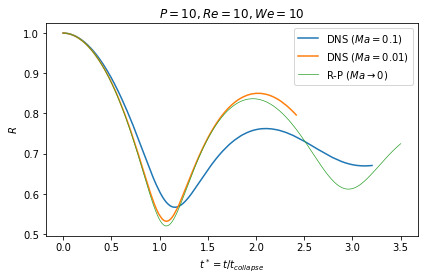

In [10]:
## Reading (axi) DNS result
import pandas as pd
#data = pd.read_csv('volume_collapse.txt', sep=" ", header=None)
#print(data)

## Plotting
fig, ax1 = plt.subplots()

P = 10; Re = 10; We = 10;

ax1.set_title(r"$P=10, Re=10, We=10$")
ax1.set_xlabel(r"$t^* = t/t_{collapse}$")
ax1.set_ylabel(r"$R$")
#time collapse used in DNS is 0.915R_0\sqrt{\rho / Delta p}
data = pd.read_csv('volume_collapse.txt', sep=" ", header=None)
ax1.plot(data[0]*.915, data[1], label = r"DNS $(Ma=0.1)$")
data = pd.read_csv('volume_collapse_Ma1e-2.txt', sep=" ", header=None)
ax1.plot(data[0]*.915, data[1], label = r"DNS $(Ma=0.01)$")

tstarsample  = np.linspace(0, 3.5, N, endpoint = True)
Rstarsample,  Ustarsample = solve_RP([P, We, Re], tstarsample)
ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"R-P $(Ma \rightarrow 0)$")

ax1.legend(loc = "upper right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

## Keller-Miksis (Weekly Compressible Liquid

Keller-Miksis equation (Dimensional)

$$
    \left(1 - \frac{\dot{R}}{c_{L,0}} \right)R\frac{d^2 R}{dt^2} + \left(1 - \frac{1}{3}\frac{\dot{R}}{c_{L,0}} \right)\frac{3}{2} (\frac{dR}{dt})^2 = \left(1 + \frac{\dot{R}}{c_{L,0}} \right) \frac{1}{\rho_{L,0}} \left( p_L (R,t) - p_\infty(t) \right) + \frac{R}{\rho_{L,0} c_{L,0}} \frac{d}{dt} \left( p_L (R,t) - p_\infty(t) \right)
$$
Since the liquid is (slghtly) compressible the expression involves speed of sound at ambient. ALso the liquid density is noy constant and K-M eqn involves the liquid density at ambient.


### KM Non- Dimensional (in collapse)
In the case of  collapse, apart from the initially defined non-dim numbers $P$, $Re$ and $We$, we need one more non-dim number, the Mach number.
$$
    Ma = \frac{U_c}{c_{L,0}} = \frac{1}{c_{L,0}}\sqrt{\frac{\Delta p}{\rho_{L,0}} }
$$

\begin{eqnarray}
    \left(1 - Ma ~U^* \right)R^*\frac{d U^*}{dt^*} &+& \left(1 - \frac{1}{3} Ma ~U^* \right)\frac{3}{2} {U^*}^2 = \nonumber \\
    & & \left(1 + Ma~ U^* \right)  \left\{  \left( \frac{1}{P-1} + \frac{2}{We} \right) \left( \frac{1}{R^*} \right)^{3\gamma} - \frac{2}{We}\frac{1}{R^*}- \frac{4}{Re}\frac{1}{R^*} U^* -\frac{P}{P-1} \right\} \nonumber \\
    & & +Ma~U^* \left\{-3\gamma \left( \frac{1}{P-1} + \frac{2}{We} \right) \left( \frac{1}{R^*} \right)^{3\gamma} + \frac{2}{We}\frac{1}{R^*}+ \frac{4}{Re}\frac{1}{R^*} U^* \right\} - Ma ~\frac{4}{Re}\frac{d U^*}{d t^*}
\end{eqnarray}
which gives
$$
    \frac{dU^*}{dt^*} = \frac{1}{R^*(1 - Ma ~U^*) + Ma ~\frac{4}{Re}} \left\{ \left(1 + (1-3\gamma) Ma~ U^* \right)\left( \frac{1}{P-1} + \frac{2}{We} \right)\left( \frac{1}{R^*} \right)^{3\gamma}  - \frac{2}{We}\frac{1}{R^*}- \frac{4}{Re}\frac{1}{R^*} U^* - \left(1 + Ma~ U^* \right) \frac{P}{P-1}  -\left(1 - \frac{1}{3} Ma ~U^* \right)\frac{3}{2} {U^*}^2   \right\}
$$



In [11]:
#d/dt (x) = equation(x,t)
def KM(x, tstar):
    (Rstar,Ustar) = x;
    dfdt = (1+(1-3*gamma)*Ma*Ustar)*(1/(P-1) + 2/We)*np.power(Rstar,-3*gamma);
    dfdt += -2/(We*Rstar) -4*Ustar/(We*Rstar) - (1+Ma*Ustar)*P/(P-1);
    dfdt -= 1.5*(1-Ma*Ustar/3.)*Ustar**2
    dfdt /= ( Rstar*(1-Ma*Ustar)  + 4*Ma/Re ) ;
    return (Ustar, dfdt)

def NewRadius():
    return np.power((1 + 2*(P-1)/We)/P, 1/(3*gamma))

def solve_KM (params, tsample):
    P, We, Re, Ma =  params;
    R_KM = odeint(KM, [1, 0], tstarsample)
    Ustarsample = R_KM[:,1]
    Rstarsample = R_KM[:,0]
    return (Rstarsample, Ustarsample);
    

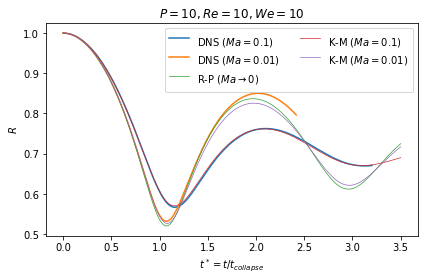

In [12]:
## Reading (axi) DNS result
import pandas as pd
#data = pd.read_csv('volume_collapse.txt', sep=" ", header=None)
#print(data)

## Plotting
fig, ax1 = plt.subplots()

P = 10; Re = 10; We = 10;

ax1.set_title(r"$P=10, Re=10, We=10$")
ax1.set_xlabel(r"$t^* = t/t_{collapse}$")
ax1.set_ylabel(r"$R$")
#time collapse used in DNS is 0.915R_0\sqrt{\rho / Delta p}
data = pd.read_csv('volume_collapse.txt', sep=" ", header=None)
ax1.plot(data[0]*.915, data[1], label = r"DNS $(Ma=0.1)$")
data = pd.read_csv('volume_collapse_Ma1e-2.txt', sep=" ", header=None)
ax1.plot(data[0]*.915, data[1], label = r"DNS $(Ma=0.01)$")

tstarsample  = np.linspace(0, 3.5, N, endpoint = True)
Rstarsample,  Ustarsample = solve_RP([P, We, Re], tstarsample)
ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"R-P $(Ma \rightarrow 0)$")
Ma = 0.1;
Rstarsample,  Ustarsample = solve_KM([P, We, Re, Ma], tstarsample)
ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"K-M $(Ma = 0.1)$")
Ma = 0.01;
Rstarsample,  Ustarsample = solve_KM([P, We, Re, Ma], tstarsample)
ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"K-M $(Ma = 0.01)$")

ax1.legend(loc = "upper right", ncol=2, handleheight=2.4, labelspacing=0.05)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

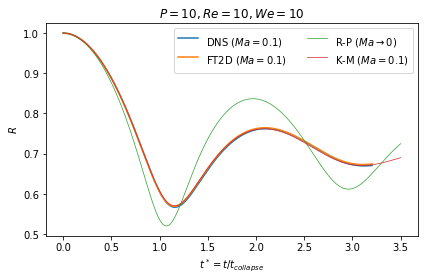

In [13]:
## Reading (axi) DNS result
import pandas as pd
#data = pd.read_csv('volume_collapse.txt', sep=" ", header=None)
#print(data)

## Plotting
fig, ax1 = plt.subplots()

P = 10; Re = 10; We = 10;

ax1.set_title(r"$P=10, Re=10, We=10$")
ax1.set_xlabel(r"$t^* = t/t_{collapse}$")
ax1.set_ylabel(r"$R$")
#time collapse used in DNS is 0.915R_0\sqrt{\rho / Delta p}
data = pd.read_csv('volume_collapse.txt', sep=" ", header=None)
ax1.plot(data[0]*.915, data[1], label = r"DNS $(Ma=0.1)$")
# data = pd.read_csv('volume_collapse_Ma1e-2.txt', sep=" ", header=None)
# ax1.plot(data[0]*.915, data[1], label = r"DNS $(Ma=0.01)$")
data = pd.read_csv('Ft2d.txt', sep=" ", header=None)
ax1.plot(data[0]*.915, data[1], label = r"FT2D $(Ma=0.1)$")

tstarsample  = np.linspace(0, 3.5, N, endpoint = True)
Rstarsample,  Ustarsample = solve_RP([P, We, Re], tstarsample)
ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"R-P $(Ma \rightarrow 0)$")
Ma = 0.1;
Rstarsample,  Ustarsample = solve_KM([P, We, Re, Ma], tstarsample)
ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"K-M $(Ma = 0.1)$")
# Ma = 0.01;
# Rstarsample,  Ustarsample = solve_KM([P, We, Re, Ma], tstarsample)
# ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"K-M $(Ma = 0.01)$")

ax1.legend(loc = "upper right", ncol=2, handleheight=2.4, labelspacing=0.05)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig('comparecollapse.png')

plt.show()

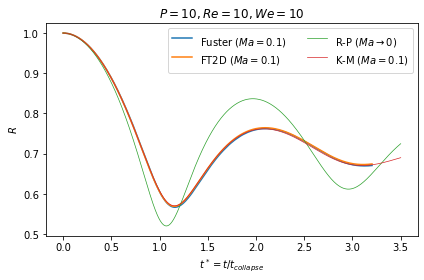

<Figure size 432x288 with 0 Axes>

In [16]:
## Reading (axi) DNS result
import pandas as pd
#data = pd.read_csv('volume_collapse.txt', sep=" ", header=None)
#print(data)

## Plotting
fig, ax1 = plt.subplots()

P = 10; Re = 10; We = 10;

ax1.set_title(r"$P=10, Re=10, We=10$")
ax1.set_xlabel(r"$t^* = t/t_{collapse}$")
ax1.set_ylabel(r"$R$")
#time collapse used in DNS is 0.915R_0\sqrt{\rho / Delta p}
data = pd.read_csv('volume_collapse.txt', sep=" ", header=None)
ax1.plot(data[0]*.915, data[1], label = r"Fuster $(Ma=0.1)$")
# data = pd.read_csv('volume_collapse_Ma1e-2.txt', sep=" ", header=None)
# ax1.plot(data[0]*.915, data[1], label = r"DNS $(Ma=0.01)$")
data = pd.read_csv('Ft2d.txt', sep=" ", header=None)
ax1.plot(data[0]*.915, data[1], label = r"FT2D $(Ma=0.1)$")

tstarsample  = np.linspace(0, 3.5, N, endpoint = True)
Rstarsample,  Ustarsample = solve_RP([P, We, Re], tstarsample)
ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"R-P $(Ma \rightarrow 0)$")
Ma = 0.1;
Rstarsample,  Ustarsample = solve_KM([P, We, Re, Ma], tstarsample)
ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"K-M $(Ma = 0.1)$")
# Ma = 0.01;
# Rstarsample,  Ustarsample = solve_KM([P, We, Re, Ma], tstarsample)
# ax1.plot(tstarsample, Rstarsample, linewidth = 0.7, label = r"K-M $(Ma = 0.01)$")

ax1.legend(loc = "upper right", ncol=2, handleheight=2.4, labelspacing=0.05)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig('comparecollapse.png')

plt.show()

